## Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

### Data Source

https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [1]:
# Import dependencies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# For default view 
pd.set_option("display.max_columns", 75)

In [2]:
# Import data 
df = pd.read_csv("/home/western/Documents/Data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# Numeric columns 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


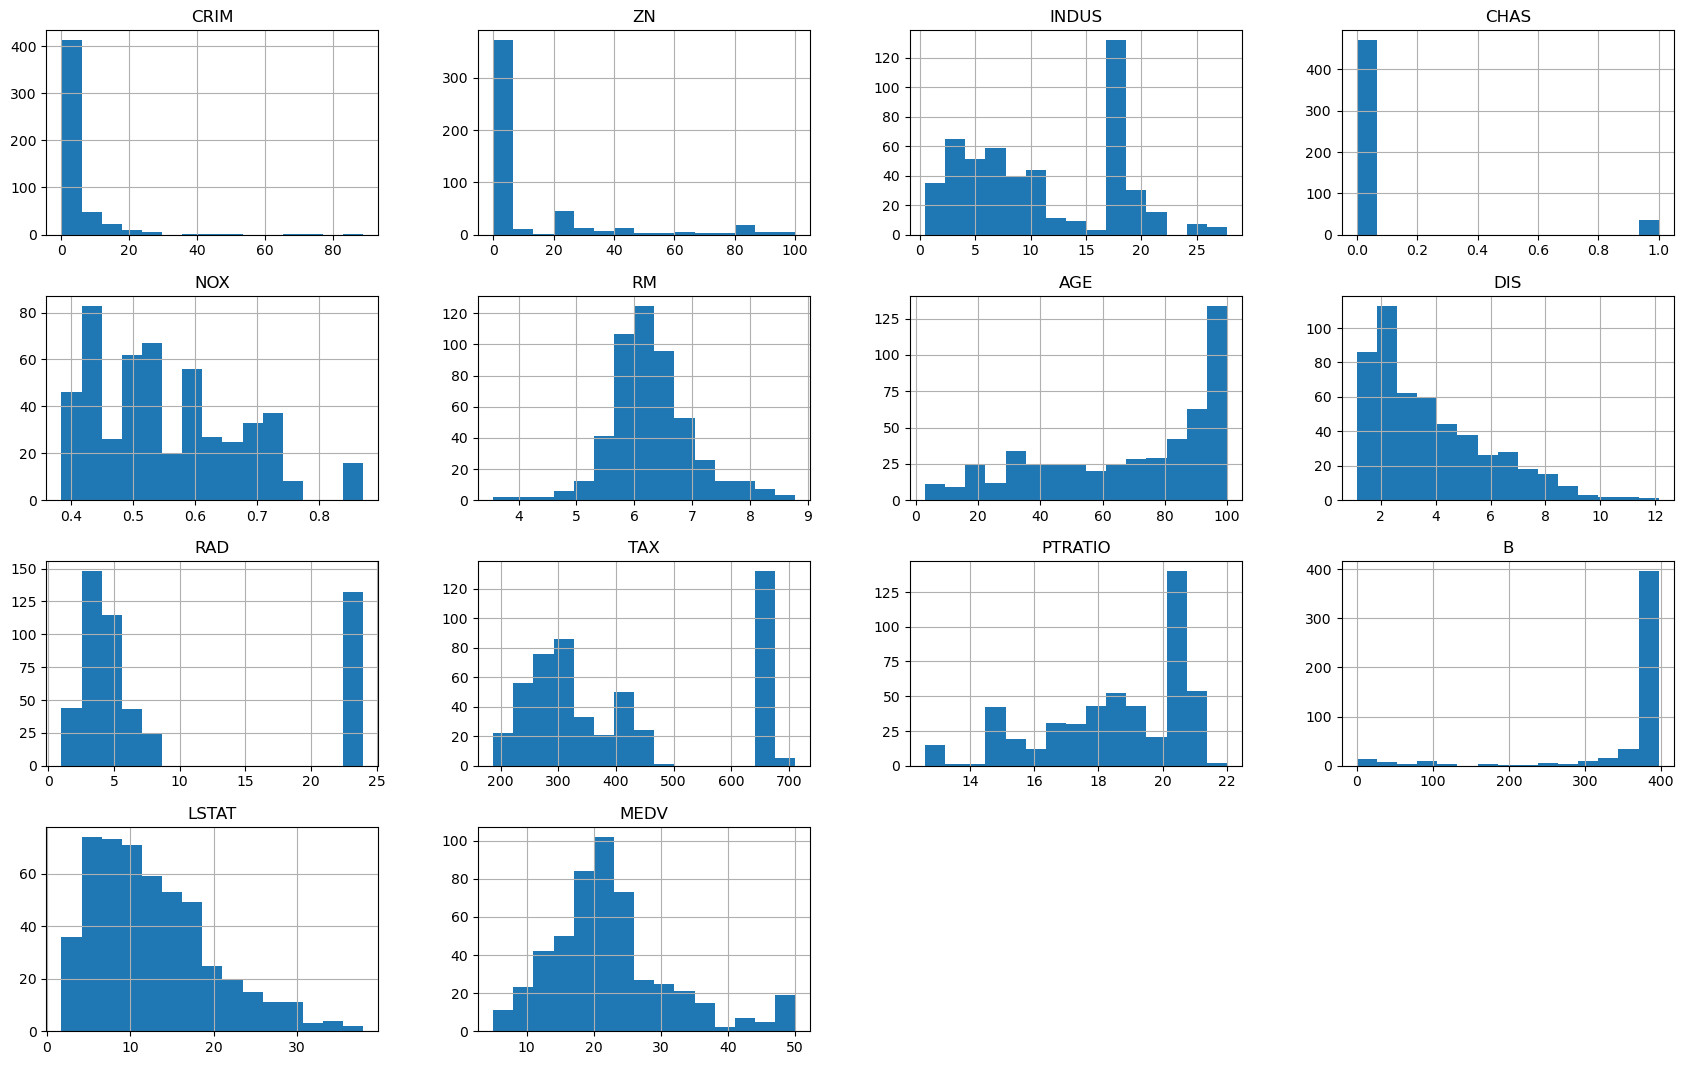

In [5]:
df.hist(bins=15, figsize=(21,13));

### Outliers 

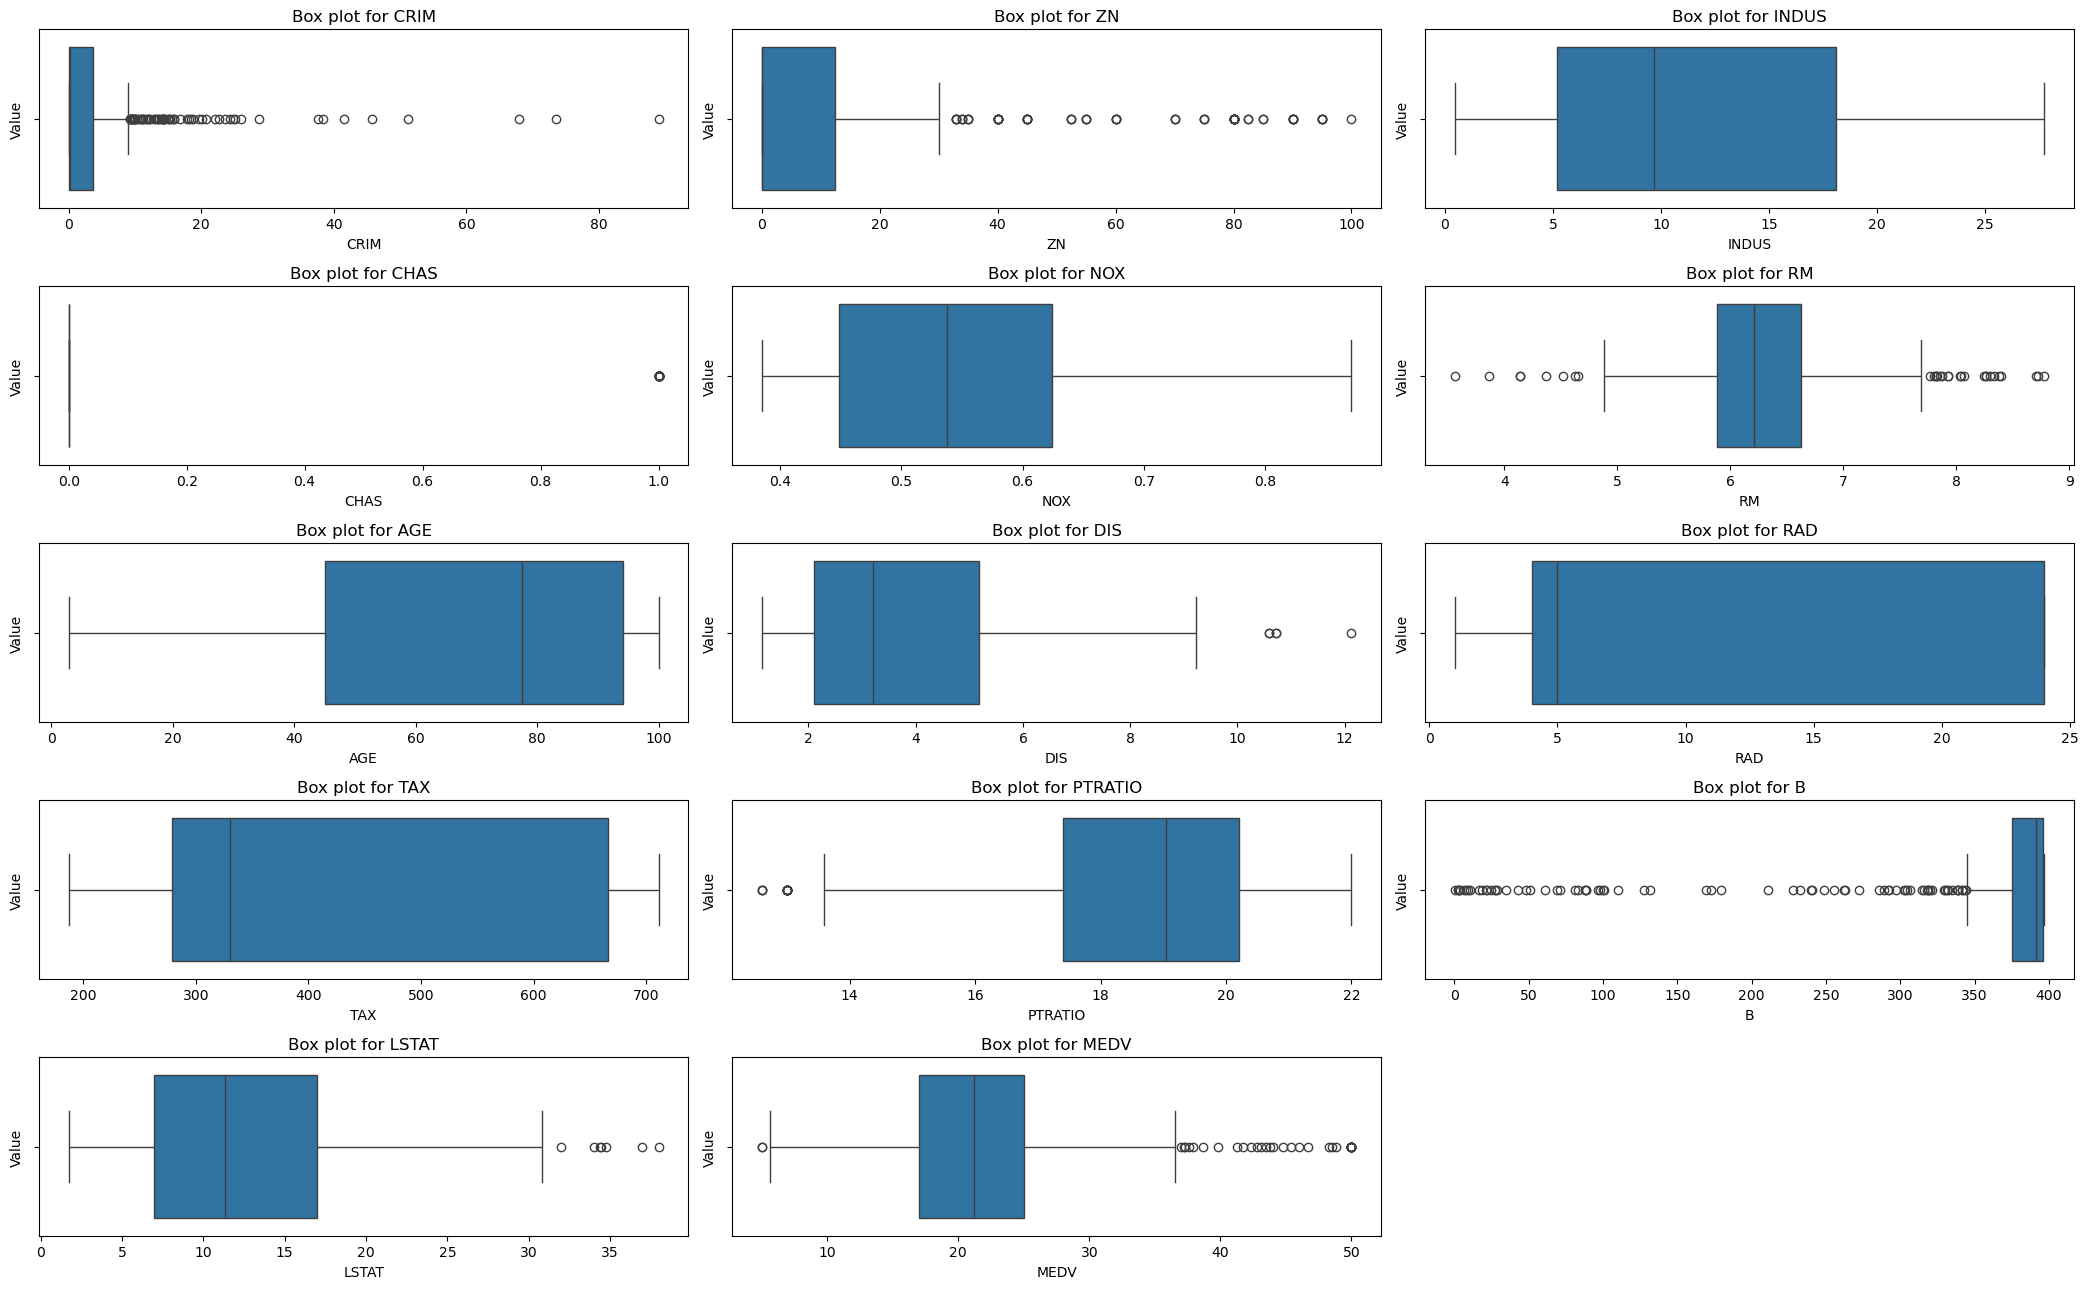

In [6]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [7]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.10)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 506
Number of rows after removing outliers: 432
Number of rows removed: 74


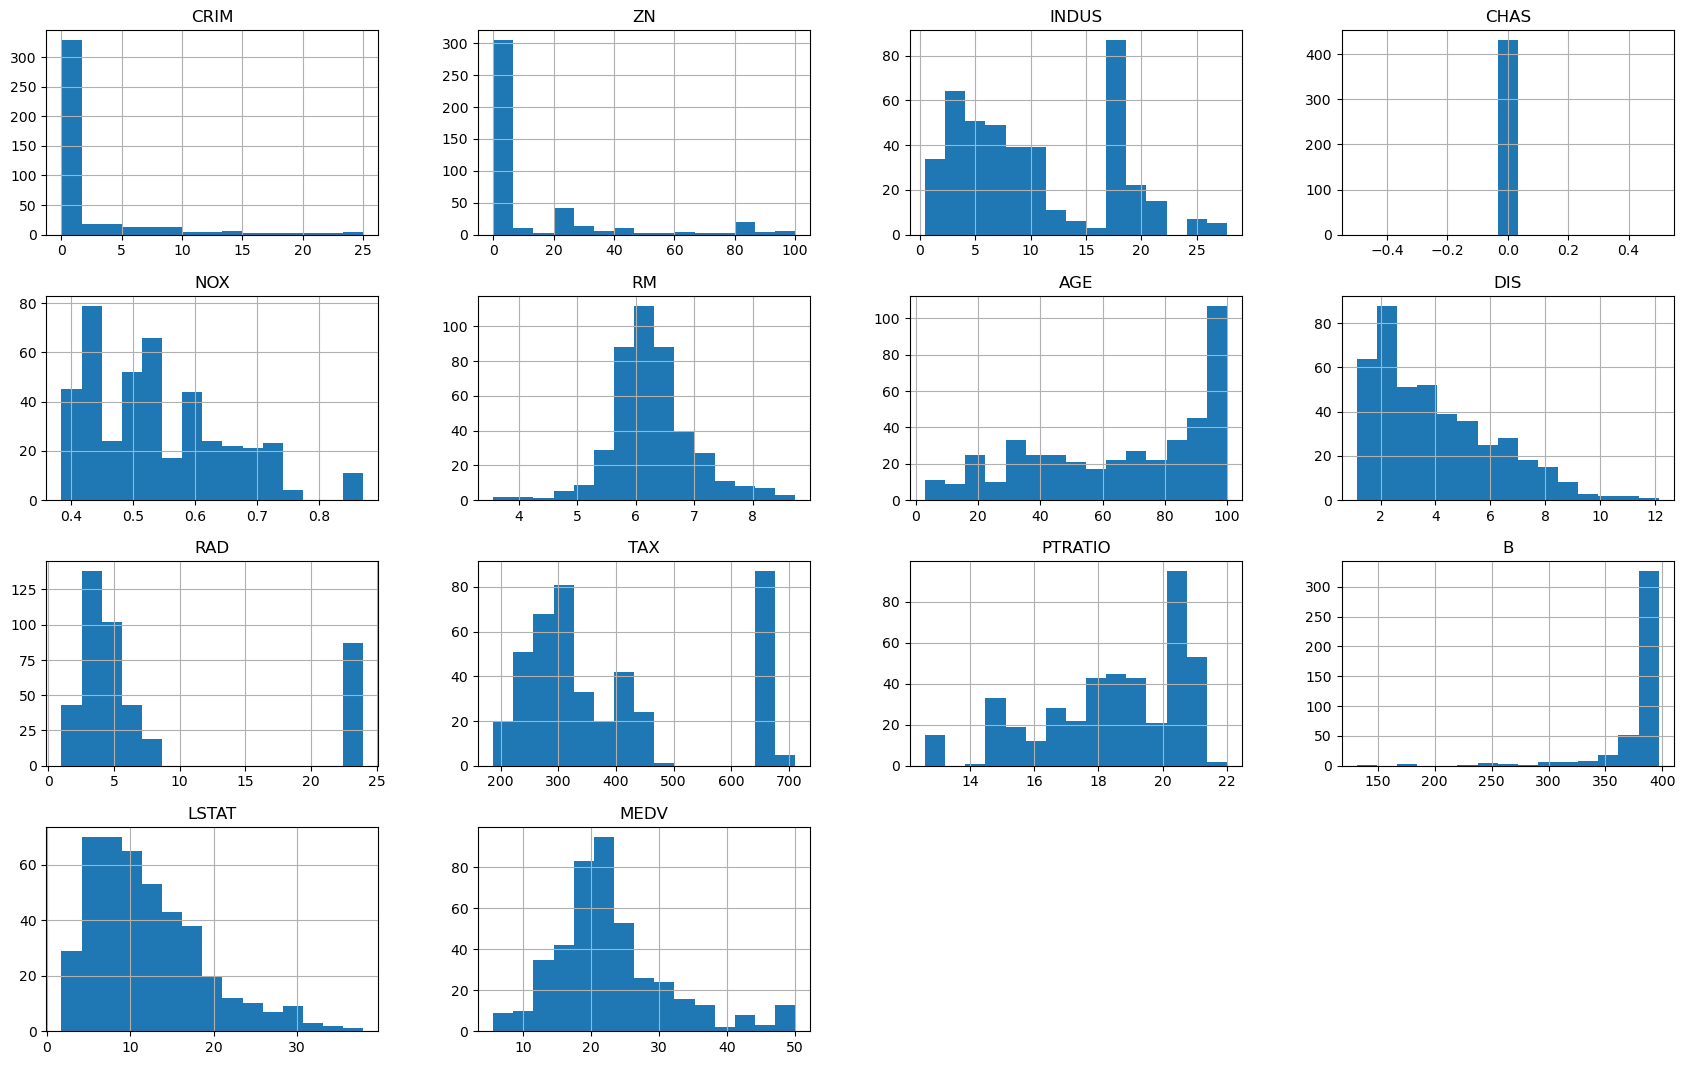

In [8]:
df.hist(bins=15, figsize=(21,13));

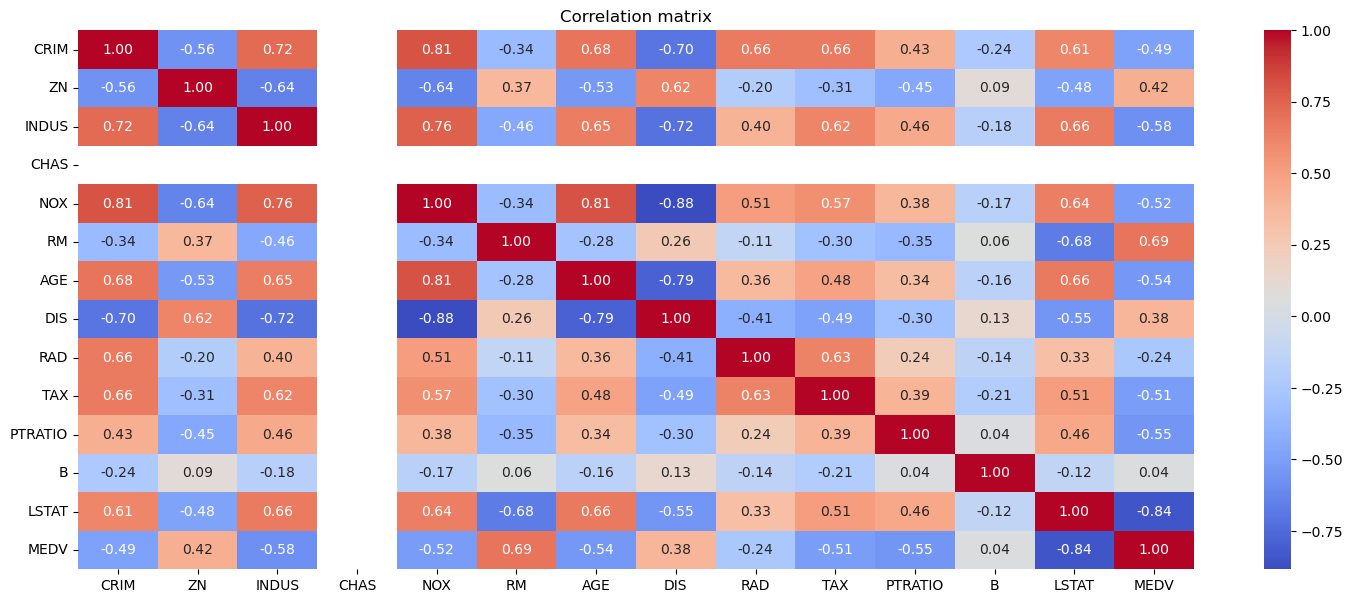

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='spearman')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [10]:

import pandas as pd
import numpy as np

# Make a copy of the original DataFrame
df_log = df.copy()

# Apply Log transformation to each numeric column
for col in df_log.select_dtypes(include=[np.number]).columns:
    # Ensure all values are positive
    if (df_log[col] <= 0).any():
        df_log[col] = df_log[col] + abs(df_log[col].min()) + 1
    
    # Apply log transformation
    df_log[col] = np.log(df_log[col])

print("Log Transformation Applied Successfully")
df_log.head()


Log Transformation Applied Successfully


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,2.944439,0.837248,0.0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,0.000000,1.955860,0.0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,0.000000,1.955860,0.0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,0.000000,0.779325,0.0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,0.000000,0.779325,0.0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


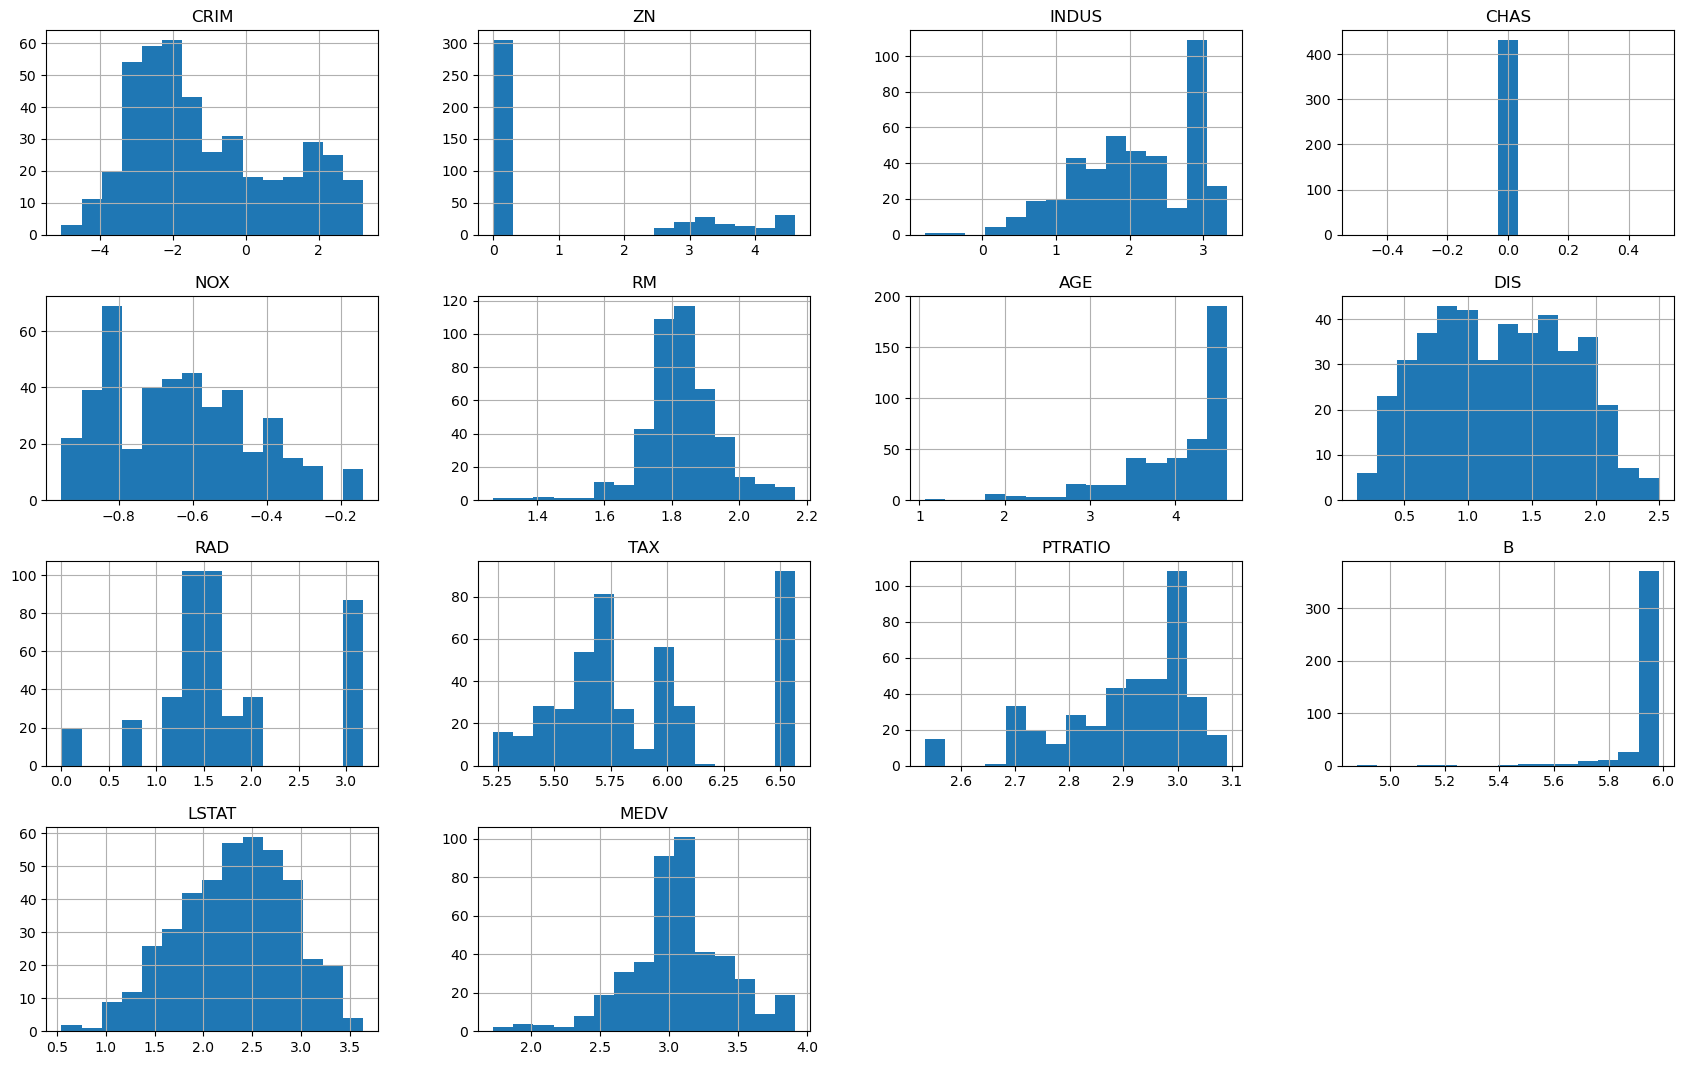

In [11]:
df_log.hist(bins=15, figsize=(21,13));

In [12]:
df = df_log.copy()

In [13]:
##Modeling 
# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Drop null values
df = df.dropna()

# Defining the dependent variables/features
X = df.drop(columns=['MEDV'])  # Features
y = df['MEDV']  # Target variable



In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,2.944439,0.837248,0.0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430
1,-3.600502,0.000000,1.955860,0.0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660
2,-3.601235,0.000000,1.955860,0.0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766
3,-3.430523,0.000000,0.779325,0.0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410
4,-2.672924,0.000000,0.779325,0.0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351


In [16]:
y.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: MEDV, dtype: float64

In [17]:
# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the specified columns in the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# Reset the index of y_train to match X_train_scaled
y_train = y_train.reset_index(drop=True)
X_train_scaled = X_train_scaled.reset_index(drop=True)

## Ordinary least squares

In [18]:
# Add a constant to the predictors (for statsmodels)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model
linreg = sm.OLS(y_train, X_train_const).fit()

# Print the model summary with column names
print(linreg.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     85.17
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.15e-87
Time:                        11:27:40   Log-Likelihood:                 101.82
No. Observations:                 302   AIC:                            -177.6
Df Residuals:                     289   BIC:                            -129.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0729      0.010    302.453      0.0

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression
linear_reg = LinearRegression()

# Initialize RFE with the Linear Regression model and desired number of features
rfe = RFE(estimator=linear_reg, n_features_to_select=53)

# Fit RFE on training data
rfe = rfe.fit(X_train_scaled, y_train)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Display the selected features mask
print(selected_features_mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


/home/western/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=53 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


In [20]:
# List features, their selection status, and their ranks
feature_selection = list(zip(X_train_scaled, rfe.support_, rfe.ranking_))

# Display the feature selection results
for feature, selected, rank in feature_selection:
    print(f"Feature: {feature}, Selected: {selected}, Rank: {rank}")


Feature: CRIM, Selected: True, Rank: 1
Feature: ZN, Selected: True, Rank: 1
Feature: INDUS, Selected: True, Rank: 1
Feature: CHAS, Selected: True, Rank: 1
Feature: NOX, Selected: True, Rank: 1
Feature: RM, Selected: True, Rank: 1
Feature: AGE, Selected: True, Rank: 1
Feature: DIS, Selected: True, Rank: 1
Feature: RAD, Selected: True, Rank: 1
Feature: TAX, Selected: True, Rank: 1
Feature: PTRATIO, Selected: True, Rank: 1
Feature: B, Selected: True, Rank: 1
Feature: LSTAT, Selected: True, Rank: 1


## Multicolinearlity with VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


    Feature       VIF
0      CRIM  7.272002
1        ZN  2.498617
2     INDUS  3.600441
3      CHAS       NaN
4       NOX  6.885565
5        RM  2.124368
6       AGE  2.359889
7       DIS  5.052803
8       RAD  4.167977
9       TAX  3.242272
10  PTRATIO  1.810177
11        B  1.234443
12    LSTAT  3.407710


/home/western/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure no constant features
constant_features = [col for col in X_train_scaled.columns if X_train_scaled[col].nunique() == 1]
if constant_features:
    print(f"Constant features detected: {constant_features}")
    X_train_scaled = X_train_scaled.drop(columns=constant_features)

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


Constant features detected: ['CHAS']
    Feature       VIF
0      CRIM  7.272002
1        ZN  2.498617
2     INDUS  3.600441
3       NOX  6.885565
4        RM  2.124368
5       AGE  2.359889
6       DIS  5.052803
7       RAD  4.167977
8       TAX  3.242272
9   PTRATIO  1.810177
10        B  1.234443
11    LSTAT  3.407710


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Add a constant to the test data
X_test_const = sm.add_constant(X_test_scaled)

# Perform predictions on the test data
y_pred = linreg.predict(X_test_const)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation on Test Data:
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
R-squared (R²): 0.72


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_const.shape[1] - 1))

# Display the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")


Model Evaluation Metrics:
MAE: 0.13
MSE: 0.04
RMSE: 0.19
R²: 0.72
Adjusted R²: 0.69


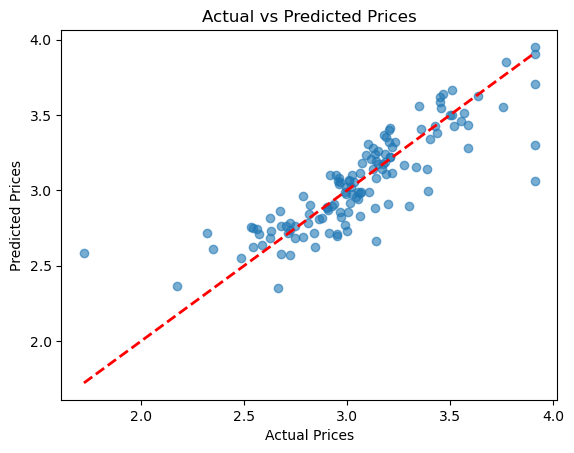

In [25]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

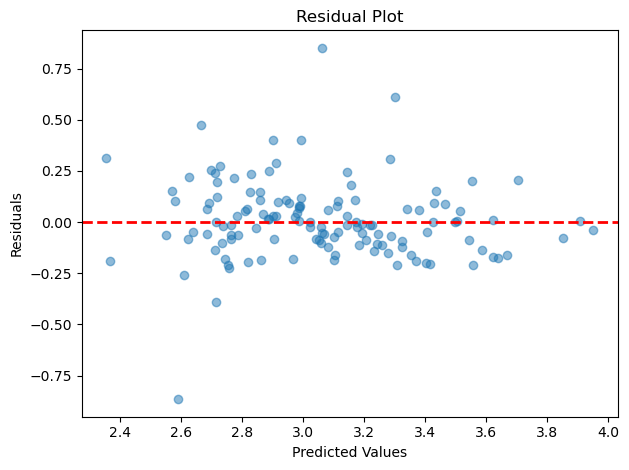

In [26]:
# Make predictions on the testing data
#y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

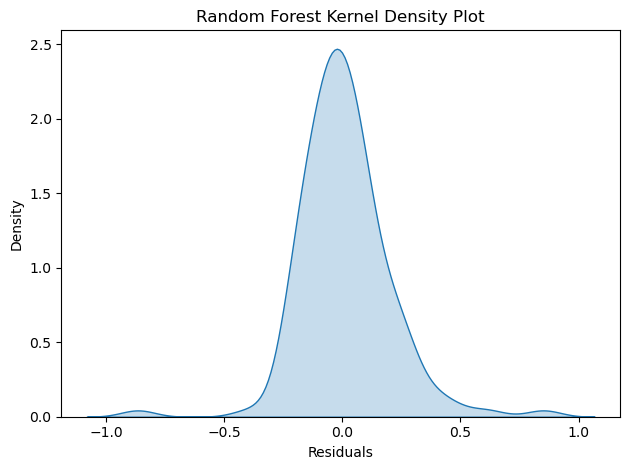

In [27]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

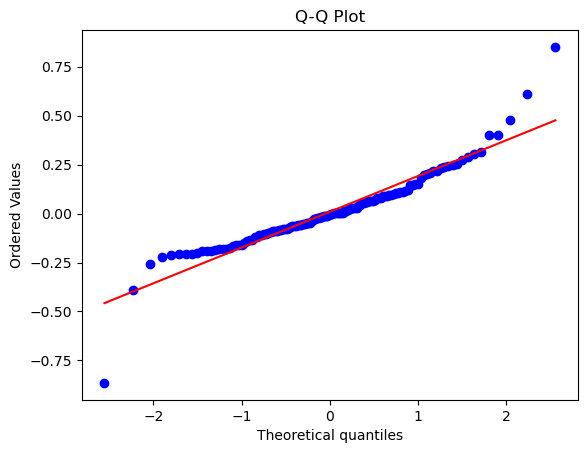

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()